In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import tabulate

In [2]:
#takes a random dataset and filters linearly correlated points
def dataFilterLinear(dataSet, m, width):
    indexes = []
    for i in range(len(dataSet)):
        c = width
        y = dataSet[i,1]
        x = dataSet[i,0]
        c += np.random.randint(-c/4, c/4)
        if(y <= ((m*x)-c) or y >=  ((m*x)+c)):
            indexes.append(i)
    return np.delete(dataSet, indexes, 0)

In [3]:
#plots a dataSet and a line
def fitPlotter(dataSet, m, c, style, name):
    x = np.linspace(min(dataSet[:,0]),max(dataSet[:,0]),100)
    y = m*x+c
    plt.plot(x,y, style, label=name)
    plt.plot(dataSet[:,0],dataSet[:,1], '.g')
    plt.legend(loc=4)
    plt.show()

In [4]:
#the (euclidean) distance between two vectors
def distance(a,b):
    return np.linalg.norm(np.subtract(a,b))

In [5]:
#batch gradient descent
def batchGradientDescent(dataSet, model, learningRate):
    gradwm = 0
    gradwc = 0
    
    m = model[0]
    c = model[1]
    N = len(dataSet)
    
    for point in dataSet:
        x = point[0]
        y = point[1]
        
        gradwm += (2/N)*x*(m*x + c - y)
        gradwc += (2/N)*(m*x + c - y)
    
    grad = [gradwm, gradwc]
    updatedModel = np.subtract(model, np.multiply(learningRate,grad))
    if distance(model, updatedModel)< 0.01: 
        return updatedModel
    else:
        return batchGradientDescent(dataSet, updatedModel, learningRate)

In [6]:
#mini batch gradient descent
def miniBatchGradientDescent(dataSet, batchSize, model, learningRate, count):
    if count > 50:
        print("did not converge in 50 iterations")
        return model
    else:
        #break dataSet into parts
        if batchSize > len(dataSet):
            miniBatch = [0]*batchSize
            for i in range(batchSize):
                if dataSet != []:
                    miniBatch[i] = dataSet[i]
            np.delete(dataSet,[i for i in range(batchSize)],0)
        else:
            miniBatch = dataSet
        
        updatedModel = miniBatchGradientDescentHelper(miniBatch, model, learningRate)
        
        if distance(model,updatedModel)<0.01:
            print("converged in " + str(count) + " iteration")
            return updatedModel
        else:
            return miniBatchGradientDescent(dataSet, batchSize, updatedModel, learningRate, count+1)

#a helper function for miniBatchGradientDescent
def miniBatchGradientDescentHelper(dataSet, model, learningRate):
    gradwm = 0
    gradwc = 0
    
    m = model[0]
    c = model[1]
    N = len(dataSet)
    
    for point in dataSet:
        x = point[0]
        y = point[1]
        
        gradwm += (2/N)*x*(m*x + c - y)
        gradwc += (2/N)*(m*x + c - y)
    
    grad = [gradwm, gradwc]
    updatedModel = np.subtract(model, np.multiply(learningRate,grad))
    
    return updatedModel
    

In [7]:
#Stochastic Gradient Descent
def stochasticGradientDescent(dataSet, model, learningRate):
    return miniBatchGradientDescent(dataSet, 1, model, learningRate,0)

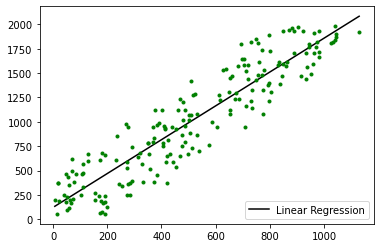

In [8]:
#Creating a linearly correlated data set
#Plotted it with it's Linear Regression fit
dataSet = np.random.randint(0,2000, size = [1000,2])
dataSet = dataFilterLinear(dataSet,2,400)
reg = LinearRegression().fit(dataSet[:,0].reshape(-1,1),dataSet[:,1])
fitPlotter(dataSet, reg.coef_[0], reg.intercept_, '-k', 'Linear Regression')

In [9]:
#using same initial guess and learning rate
guessModel = [1,100]
learningRate = 0.000001

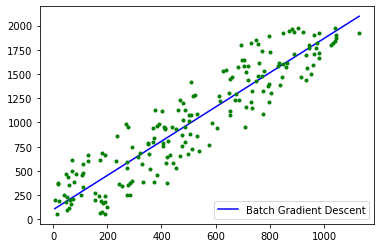

In [10]:
#Batch Gradient Descent
batchGDModel = batchGradientDescent(dataSet, guessModel, learningRate)
fitPlotter(dataSet, batchGDModel[0], batchGDModel[1], '-b', 'Batch Gradient Descent')

converged in 4 iteration


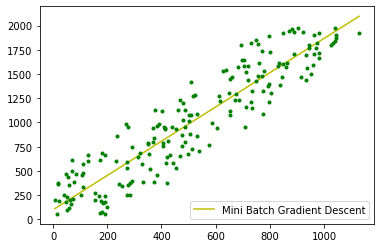

In [11]:
#mini batch gradient descent
batchSize = 20
miniBatchGDModel = miniBatchGradientDescent(dataSet,batchSize,guessModel,learningRate,0)
fitPlotter(dataSet, miniBatchGDModel[0], miniBatchGDModel[1], '-y', 'Mini Batch Gradient Descent')

converged in 24 iteration


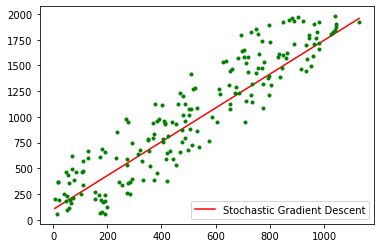

In [12]:
#stochastic gradient descent
stochasticGDModel = stochasticGradientDescent(dataSet,guessModel,0.0000001)
fitPlotter(dataSet, stochasticGDModel[0], stochasticGDModel[1], '-r', 'Stochastic Gradient Descent')

In [13]:
#comparison
headers = ["LR", "Batch GD", "Mini Batch GD", "Stochastic GD"]
models =  [[reg.coef_[0],batchGDModel[0],miniBatchGDModel[0],stochasticGDModel[0]],
           [reg.intercept_,batchGDModel[1],miniBatchGDModel[1],stochasticGDModel[1]]]
print(tabulate.tabulate(models,headers=headers,tablefmt="fancy_grid"))

╒═══════════╤════════════╤═════════════════╤═════════════════╕
│        LR │   Batch GD │   Mini Batch GD │   Stochastic GD │
╞═══════════╪════════════╪═════════════════╪═════════════════╡
│   1.73365 │     1.7662 │          1.7662 │         1.64459 │
├───────────┼────────────┼─────────────────┼─────────────────┤
│ 123.576   │   100.001  │        100.001  │       100.001   │
╘═══════════╧════════════╧═════════════════╧═════════════════╛


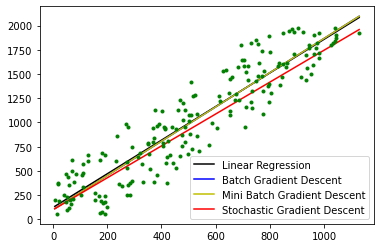

In [14]:
#plotting everything on the same graph
X = np.linspace(min(dataSet[:,0]),max(dataSet[:,0]),100)
Y_LR = reg.coef_[0]*X + reg.intercept_
Y_BGD = batchGDModel[0]*X + batchGDModel[1]
Y_MBGD = miniBatchGDModel[0]*X + miniBatchGDModel[1]
Y_SGD = stochasticGDModel[0]*X + stochasticGDModel[1]

plt.plot(X,Y_LR,'-k',label='Linear Regression')
plt.plot(X,Y_BGD,'-b',label='Batch Gradient Descent')
plt.plot(X,Y_MBGD,'-y',label='Mini Batch Gradient Descent')
plt.plot(X,Y_SGD,'-r',label='Stochastic Gradient Descent')
plt.plot(dataSet[:,0],dataSet[:,1], '.g')
plt.legend(loc=4)
plt.show()